In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sn
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json

# Used to measure whether our data is stationary
from statsmodels.tsa.stattools import adfuller

In [69]:
from statsmodels.tsa.api import VAR
gdp_df=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Time series\\Time Series Forecasting Derek Banas\\New folder\\gdp-data.csv',
                  index_col='date',parse_dates=True)

In [70]:
gdp_df#Biz_apps(Business application formed),prod(overall productivity of a cityzen)

,gdp,biz-apps,prod
date,,,
2004-09-30,12522.425,574777,89.09
2004-12-31,12761.337,583203,89.82
2005-03-31,12910.022,610664,89.53
2005-06-30,13142.873,618094,89.85
2005-09-30,13332.316,630382,90.22
...,...,...,...
2019-03-31,21329.877,867497,103.51
2019-06-30,21540.325,865909,103.55
2019-09-30,21747.394,859345,103.64


In [71]:
gdp_df= gdp_df.dropna()
gdp_df= gdp_df.asfreq('Q')
gdp_df =gdp_df[gdp_df.index<'2020-03-31']


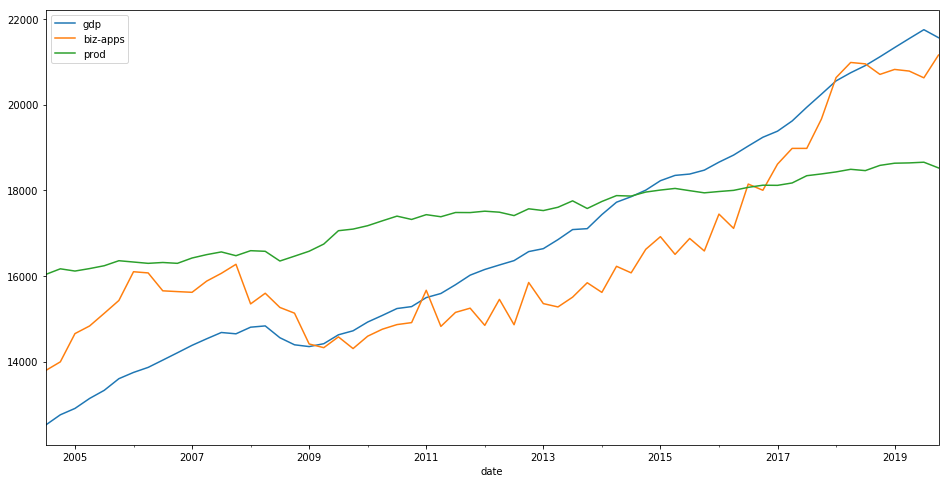

In [72]:
gdp_df['gdp'].plot(legend=True,figsize=(16,8))
gdp_df['biz-apps']=gdp_df['biz-apps']*0.024#21561.139/881487=0.02445996254057065
gdp_df['biz-apps'].plot(legend=True)
gdp_df['prod']=gdp_df['prod']*180#21561.139/102.90=209.5348785228377
gdp_df['prod'].plot(legend=True)
#Scaling other variable with gdp


In [73]:
gdp_df

,gdp,biz-apps,prod
date,,,
2004-09-30,12522.425,13794.648,16036.2
2004-12-31,12761.337,13996.872,16167.6
2005-03-31,12910.022,14655.936,16115.4
2005-06-30,13142.873,14834.256,16173.0
2005-09-30,13332.316,15129.168,16239.6
...,...,...,...
2018-12-31,21115.309,20704.176,18581.4
2019-03-31,21329.877,20819.928,18631.8
2019-06-30,21540.325,20781.816,18639.0


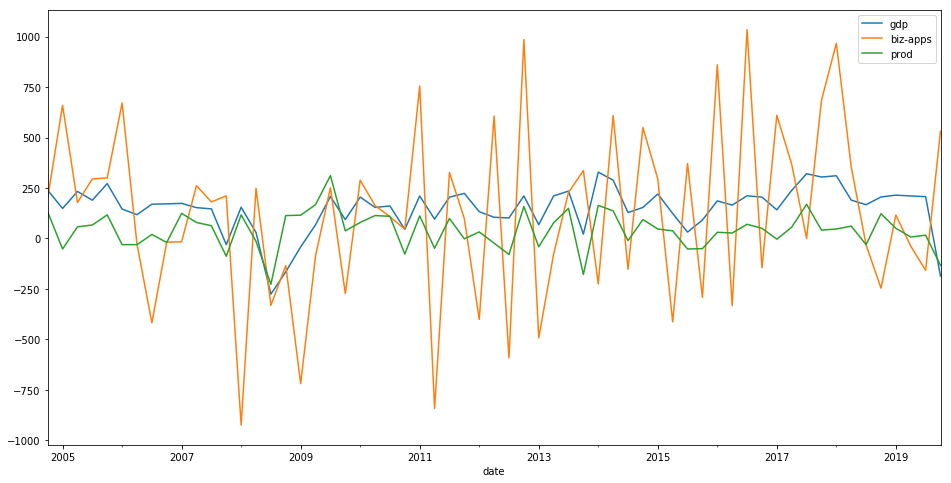

In [74]:
#Make our Data stationary 
gdp_diff_df = gdp_df.diff()
gdp_diff_df=gdp_diff_df.dropna()
gdp_diff_df.plot(legend=True,figsize=(16,8))

In [75]:
def adf_test(timeseries):
    print ('Dickey-Fuller Test')
    # AIC aims to minimize corresponding information
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)

In [76]:
adf_test(gdp_diff_df['gdp'])
adf_test(gdp_diff_df['biz-apps'])
adf_test(gdp_diff_df['prod'])#p_value less than 0.05 means the data is stationary

Dickey-Fuller Test
Test Statistic                 -4.231840
p-value                         0.000582
#Lags Used                      0.000000
Number of Observations Used    60.000000
dtype: float64
Dickey-Fuller Test
Test Statistic                 -4.847785
p-value                         0.000044
#Lags Used                      1.000000
Number of Observations Used    59.000000
dtype: float64
Dickey-Fuller Test
Test Statistic                -8.342130e+00
p-value                        3.155371e-13
#Lags Used                     0.000000e+00
Number of Observations Used    6.000000e+01
dtype: float64


In [77]:
#train and test data 
train_df= gdp_diff_df[:-4]#183*80%=146
test_df = gdp_diff_df[-4:]
mod=VAR(train_df)
for p in range(1,8):#P is number of lag taking in our model we are taking past 1St quarter data
    res=mod.fit(p)
    print(f'Order:{p}, AIC:{res.aic}')

Order:1, AIC:29.11916706342382
Order:2, AIC:29.235165355659312
Order:3, AIC:29.26777092587122
Order:4, AIC:29.205250689760046
Order:5, AIC:29.12398255682054
Order:6, AIC:29.340851534405395
Order:7, AIC:29.541315070481268


In [78]:
train_df

,gdp,biz-apps,prod
date,,,
2004-12-31,238.912,202.224,131.4
2005-03-31,148.685,659.064,-52.2
2005-06-30,232.851,178.320,57.6
2005-09-30,189.443,294.912,66.6
2005-12-31,271.617,299.736,117.0
2006-03-31,145.873,670.440,-30.6
2006-06-30,117.663,-27.480,-30.6
2006-09-30,169.759,-417.840,19.8
2006-12-31,171.341,-18.264,-19.8


In [79]:
test_df

,gdp,biz-apps,prod
date,,,
2019-03-31,214.568,115.752,50.4
2019-06-30,210.448,-38.112,7.2
2019-09-30,207.069,-157.536,16.2
2019-12-31,-186.255,531.408,-133.2


In [80]:
res=mod.fit(1)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Jul, 2022
Time:                     00:31:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    29.5532
Nobs:                     56.0000    HQIC:                   29.2874
Log likelihood:          -1041.72    FPE:                4.43212e+12
AIC:                      29.1192    Det(Omega_mle):     3.60347e+12
--------------------------------------------------------------------
Results for equation gdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              63.888147        21.633359            2.953           0.003
L1.gdp              0.712546         0.145363            4.902           0.000
L1.biz-apps        -0.023559         0.029578           -0.797        

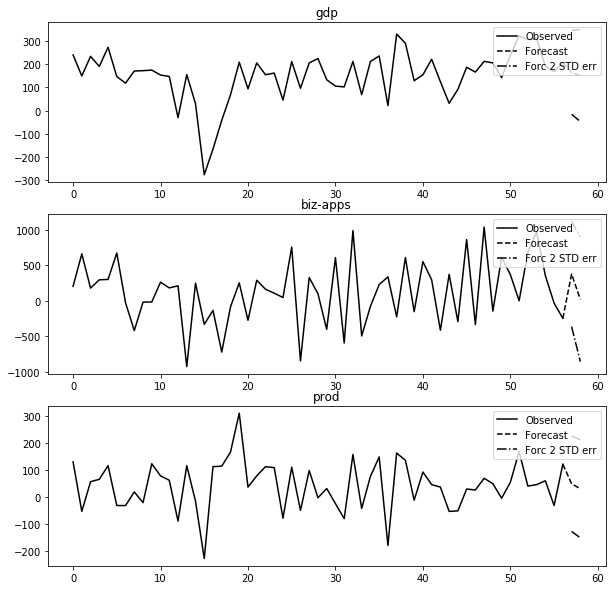

In [89]:
Forecas_res=res.forecast(train_df.values[-1:],4)#gdp_diff_df.values means converting it into numpy array,we are pass in 4 values,which is quarterly data. so, it would be like a year
res.plot_forecast(2);

In [92]:
index=pd.date_range('2018-12-31',periods=4,freq="Q-DEC")
forecast_df = pd.DataFrame(Forecas_res, index=index,
                          columns=['gdp', 'biz-apps', 'prod'])
forecast_df

,gdp,biz-apps,prod
2018-12-31,163.964378,376.216859,50.283875
2019-03-31,150.446449,20.305279,31.274815
2019-06-30,157.293149,190.007889,48.078221
2019-09-30,151.018929,101.993792,39.667862


In [91]:
test_df

,gdp,biz-apps,prod
date,,,
2019-03-31,214.568,115.752,50.4
2019-06-30,210.448,-38.112,7.2
2019-09-30,207.069,-157.536,16.2
2019-12-31,-186.255,531.408,-133.2
